## Variable Clustering

* In Hierarchical Clustering, we were clustering the rows. Here, we cluster the features. <br/>
* **Note: With variable clustering, we still end up with the raw variables. With PCA, we end up with other dimensional variables**
* Used for **dimensionality reduction** without transforming the original variable space. <br/>
* Variable Clustering aims to identify groups of variables with high correlations within a group, but low correlations outside the group. <br/>
* A **correlation-based distance metric** based on "Ward's method" is used to calculate the distances. <br/>
* The number of variable clusters is determined by the **amount of variance** that is retained.


In [41]:
import pandas as pd
df = pd.read_csv("/Users/cwbenton/STAT-4140/datasets/mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [42]:
df.columns = ['model','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [43]:
# Probably dependent variable, we don't need it here.
df1=df.drop('model',axis=1)

In [44]:
# We can see there might be some multicollinearity since we have many variables that are highly correlated.
df1.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


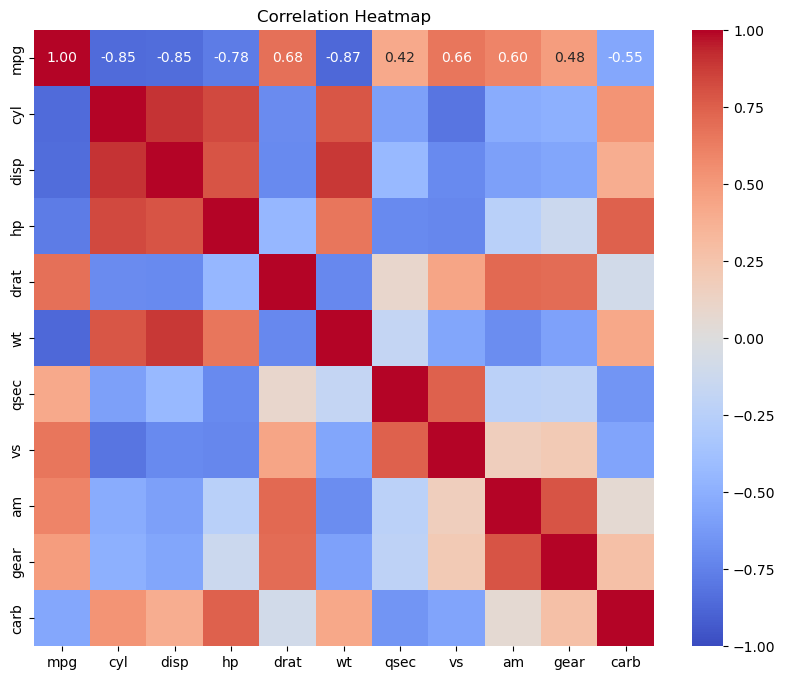

In [45]:
# A heatmap helps us visualize the correlation much better, we would like to see a lot of blue.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# Varclushi is not in the anaconda library, so we will add it here.
# !pip install varclushi

In [47]:
from varclushi import VarClusHi

In [48]:
# The second max eigenvalue is very important. Here, we use 0.7, which is a bit high.
# We can also set a maximum number of clusters.
var_clus_model = VarClusHi(df1, maxeigval2 = .7, maxclus = None)
var_clus_model.varclus()

In [49]:
vr = var_clus_model.rsquare
vr

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,hp,0.826019,0.655176,0.504550
1,0,qsec,0.786989,0.183557,0.260902
2,0,vs,0.749881,0.525874,0.527537
3,0,carb,0.714945,0.252421,0.381304
4,1,mpg,0.890775,0.473416,0.207421
5,1,disp,0.927425,0.463066,0.135165
6,1,wt,0.876414,0.531974,0.264057
7,1,cyl,0.875804,0.622720,0.329188
8,2,drat,0.779307,0.550398,0.490864
9,2,am,0.850908,0.405238,0.250676


We would like high RS value for it's own cluster and a lower RS to it's nearest cluster. For cluster 0, the qsec variable looks best. The RS_Ratio is actually a good metric -- we want it as small as possible for it to be the most representative variable for that cluster.

In [50]:
# So, we have reduced the dimensionality to 3 variables, but at what cost?
# VarProp is the amount of variance explained by each cluster. The higher, the better.
vi = var_clus_model.info
vi

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,4,3.077834,0.454379,0.769459
1,1,4,3.570419,0.220915,0.892605
2,2,3,2.471731,0.322842,0.823910


In [51]:
# Look at the total variance proportion.
vi["N_Vars"]=vi["N_Vars"].astype(float)

In [52]:
# This is the amount of variance we can explain with these 3 variables. Not bad.
total_var_prop = sum(vi["VarProp"] * vi["N_Vars"])/sum(vi["N_Vars"])
print("Total Variance Proportion: " + str(total_var_prop))

Total Variance Proportion: 0.8290894672606606


Select one variable from each cluster which has minimum RSRatio <br/>
#### RS_RATIO = (1 - RS_Own_Cluster) / (1 - RS_Next_Closest_Cluster)

In [53]:
# We can see the smallest RS_Ratio grouped by each cluster.
min_rs_ratio = vr.groupby(by="Cluster")["RS_Ratio"].min().reset_index()
min_rs_ratio

,Cluster,RS_Ratio
0,0,0.260902
1,1,0.135165
2,2,0.230472


In [54]:
# We can get the specific variable name.
result = pd.merge(min_rs_ratio, vr, on=["Cluster", "RS_Ratio"], how="inner")
result

,Cluster,RS_Ratio,Variable,RS_Own,RS_NC
0,0,0.260902,qsec,0.786989,0.183557
1,1,0.135165,disp,0.927425,0.463066
2,2,0.230472,gear,0.841517,0.312354


In [55]:
list(result['Variable'])

['qsec', 'disp', 'gear']

We have reduced our dimensionality down to 3 variables. But at what cost?

In [56]:
df2 = df1[list(result['Variable'])]

In [57]:
df2.corr()

,qsec,disp,gear
qsec,1.000000,-0.433698,-0.212682
disp,-0.433698,1.000000,-0.555569
gear,-0.212682,-0.555569,1.000000


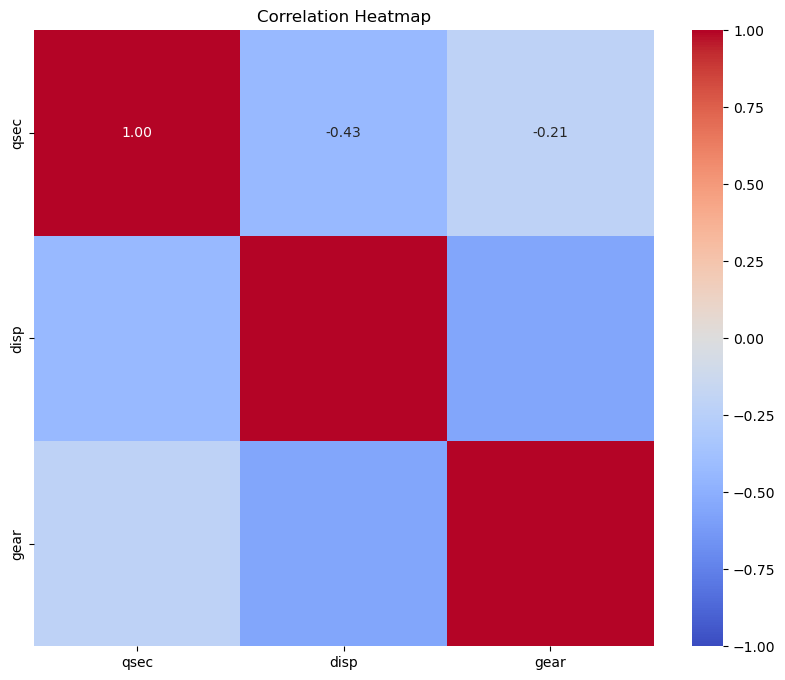

In [58]:
# Let's look at a heat map now, we hope to see mostly blue (the diagonals will obviously be red)
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [59]:
# Using variable clustering will be mostly useful when working with statistical models, since machine learning models can handle many features really well.